In [14]:
from PIL import Image
import cv2
import scipy.ndimage 
import numpy as np
from matplotlib import pyplot as plt

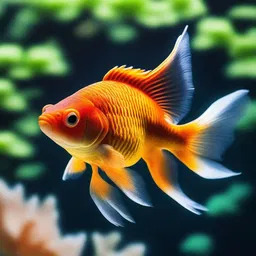

(256, 256)

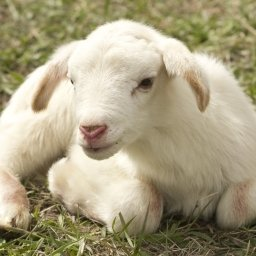

(256, 256)

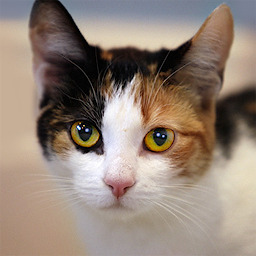

(256, 256)

In [15]:
img1 = Image.open("../../data/original/image1.jpg")
img2 = Image.open("../../data/original/image2.jpg")
img3 = Image.open("../../data/original/image3.jpg")
images = [img1, img2, img3]
for img in images:
    display(img)
    display(img.size)


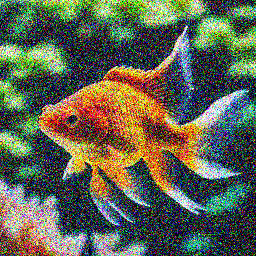

(256, 256)

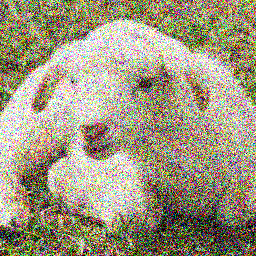

(256, 256)

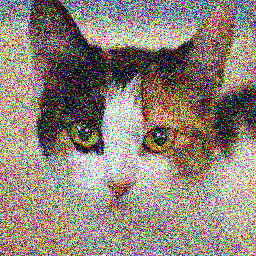

(256, 256)

In [16]:
gaussian = []
for img in images:
    img_array = np.array(img)
    sigma = 0.1 ** 0.5
    gauss = np.random.normal(0, sigma, img_array.shape)
    noisy = img_array + gauss * 255
    gaussian.append(Image.fromarray(np.clip(noisy, 0, 255).astype(np.uint8)))

for img in gaussian:
    display(img)
    display(img.size)

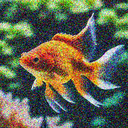

(128, 128)

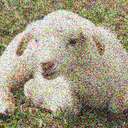

(128, 128)

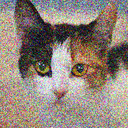

(128, 128)

In [18]:
downsampled1 = []
for img in gaussian:
    downsampled1.append(img.resize((int(img.size[0]/2), int(img.size[1]/2)), Image.Resampling.LANCZOS))

for img in downsampled1:
    display(img)
    display(img.size)

downsampled1[0].save('image0_down.png', 'PNG')
downsampled1[1].save('image1_down.png', 'PNG')
downsampled1[2].save('image2_down.png', 'PNG')



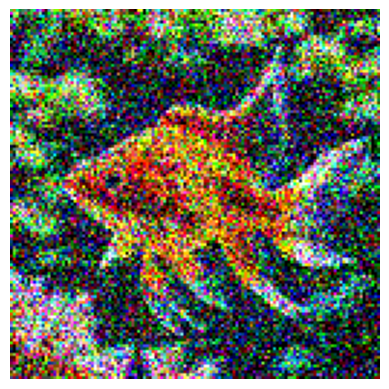

Image size: (128, 128, 3)


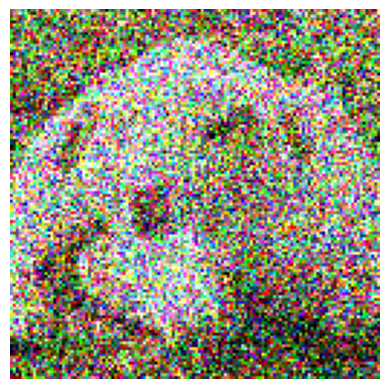

Image size: (128, 128, 3)


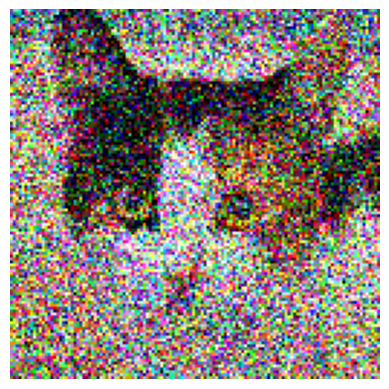

Image size: (128, 128, 3)


In [25]:
from wand.image import Image as WandImage
import matplotlib.pyplot as plt
import numpy as np

poi = []

# Process images in downsampled1 list
with WandImage(filename ='/Users/euijeongcho/Documents/EECS442/442_Project/src/notebooks/image0_down.png') as img:
    img.noise("poisson", 0.3)
    # img.save(filename=output_path)
    poi.append(np.array(img).astype(np.uint8))

with WandImage(filename ='/Users/euijeongcho/Documents/EECS442/442_Project/src/notebooks/image1_down.png') as img:
    img.noise("poisson", 0.3)
    # img.save(filename=output_path)
    poi.append(np.array(img).astype(np.uint8))

with WandImage(filename ='/Users/euijeongcho/Documents/EECS442/442_Project/src/notebooks/image2_down.png') as img:
    img.noise("poisson", 0.3)
    # img.save(filename=output_path)
    poi.append(np.array(img).astype(np.uint8))


# Display the images and their sizes
for img in poi:
    plt.imshow(img)
    plt.axis("off")  # Hide axes for cleaner display
    plt.show()
    print(f"Image size: {img.shape}")  # Print image size


(64, 64, 3)

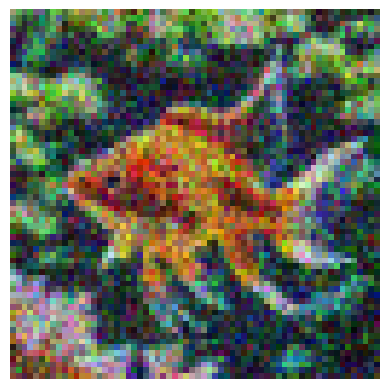

(64, 64, 3)

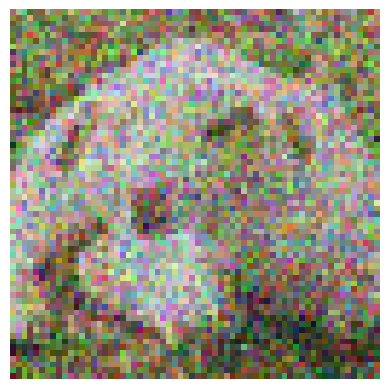

(64, 64, 3)

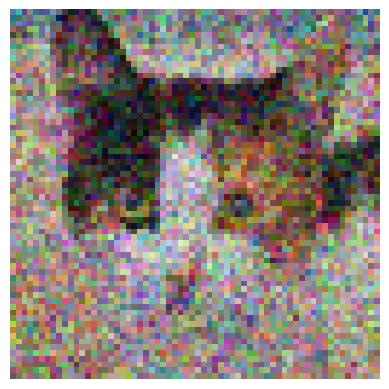

In [37]:
import numpy as np
from skimage.transform import resize

downsampled2 = []

# Iterate over the images in poi
for img in poi:
    if isinstance(img, np.ndarray):  # If img is a NumPy array
        # Resize NumPy array using skimage
        new_shape = (int(img.shape[0] / 2), int(img.shape[1] / 2), img.shape[2])  # (height, width, channels)
        img_resized = resize(img, new_shape, mode='reflect', anti_aliasing=True)
        downsampled2.append((img_resized * 255).astype(np.uint8))  # Convert to 8-bit image

# Display the images
for i, img in enumerate(downsampled2):
    display(img.shape)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    img_pil = Image.fromarray(img)
    img_pil.save(f'gp{i}_down.png', 'PNG')
